In [6]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [7]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_6000_samples_0_to_10_hz_consensus_1.0_balanced.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[2363.162109375 53567.699894344434 12613.291088274736 ...
  -1.816824634606589 1.4631832536810174 'LPD']
 [37809.05859375 137097.1698731184 225400.02522209188 ...
  2.2882800250291497 -2.9941295403920343 'Seizure']
 [494.9113464355469 9748.419955549762 1032.3055991947904 ...
  -1.1866390323185485 0.7551397705790802 'GPD']
 ...
 [18804.66796875 1820.699961900711 29440.26653939744 ...
  -2.142965943718409 -0.6550704202698684 'Seizure']
 [99960.2265625 227943.43013113737 229423.49181815755 ...
  2.2398144054187576 -1.23213027985271 'Seizure']
 [170624.375 124584.8003898263 62183.9838112558 ... -0.4277350880432941
  1.6584304581183749 'LRDA']]
(9939, 2421)


In [8]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [9]:
num_neighbors = [5, 10, 15]


model = KNeighborsClassifier(n_neighbors = 5)

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

print('Training accuracy: {:0.5f}%  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

best_model = model

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

Training accuracy: 77.91473%  Validation accuracy: 67.61%
The test results.... 66.70%


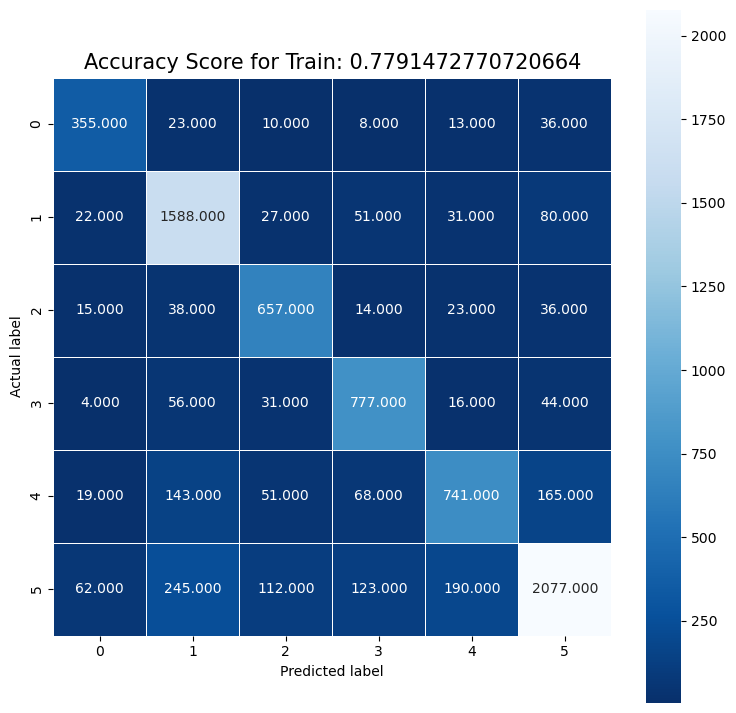

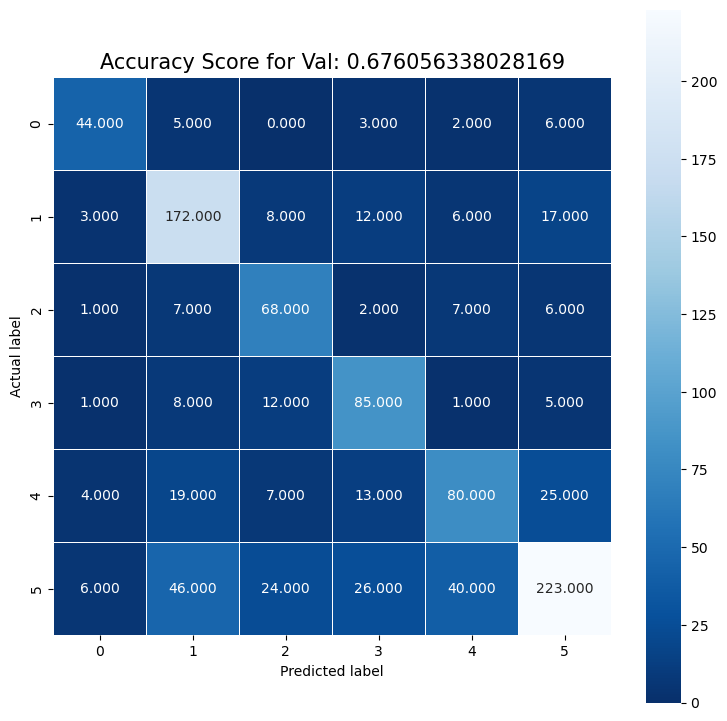

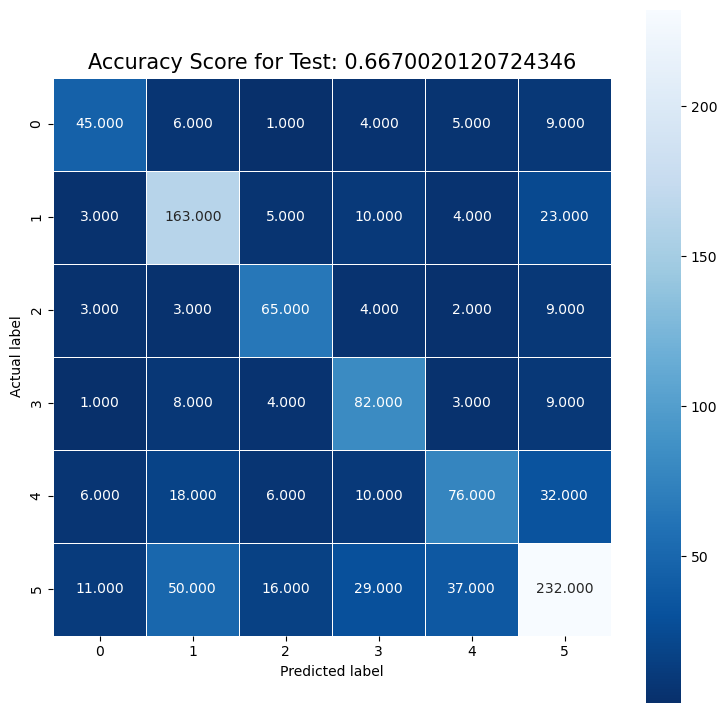

In [10]:
def confusion(predictions, actual, score, set):
    cm = skmetrics.confusion_matrix(actual, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'Accuracy Score for {set}: {score}'
    plt.title(all_sample_title, size = 15)

confusion(best_model.predict(x_train), y_train, best_model.score(x_train, y_train), "Train")
confusion(best_model.predict(x_val), y_val, best_model.score(x_val, y_val), "Val")
confusion(best_model.predict(x_test), y_test, best_model.score(x_test, y_test), "Test")